In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("operations.csv",parse_dates=[0])

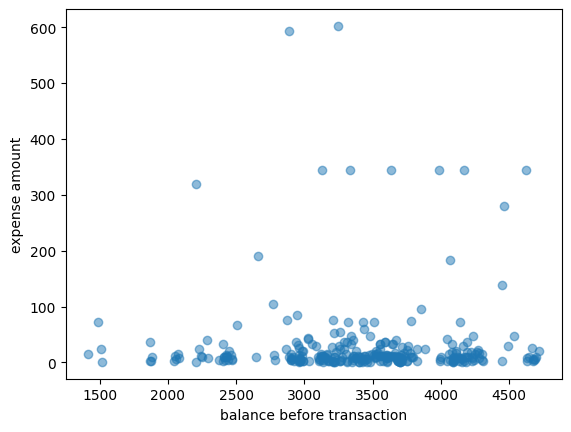

In [2]:
import matplotlib.pyplot as plt

expenses = data[data.amount < 0]
plt.plot(expenses["balance_bef_trn"],-expenses["amount"],'o',alpha=0.5)
plt.xlabel("balance before transaction")
plt.ylabel("expense amount")
plt.show()

In [4]:
import scipy.stats as st
import numpy as np

st.pearsonr(expenses["balance_bef_trn"],-expenses["amount"])[0]
np.cov(expenses["balance_bef_trn"],-expenses["amount"],ddof=0)[1,0]

np.float64(705.0942213554389)

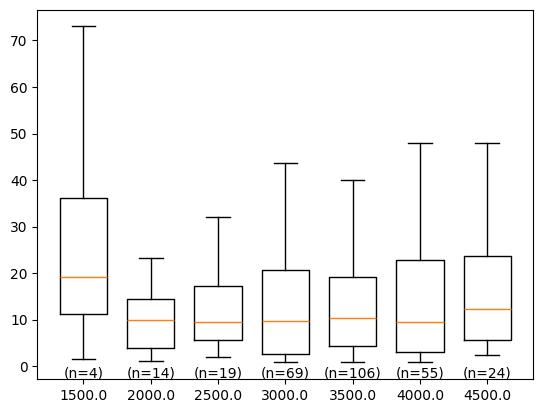

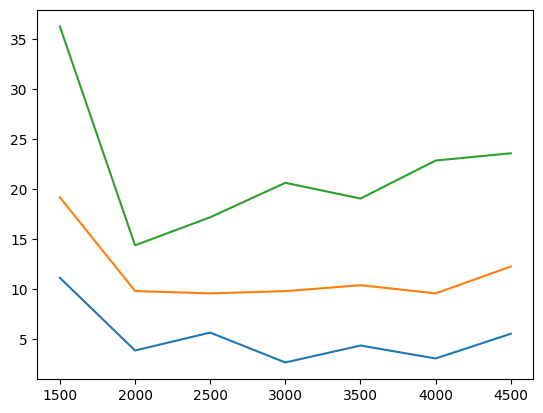

In [5]:
bin_size = 500 # size of bins for discretization

groups = [] # will receive the aggregated data to be displayed

# slices are calculated from 0 to the maximum balance in increments of bin_size]
slices = np.arange(0, max(expenses["balance_bef_trn"]), bin_size)
slices += bin_size/2 # slices are separated by half a bin size
indices = np.digitize(expenses["balance_bef_trn"], slices) # associates each balance with its bin number

for ind, tr in enumerate(slices): # for each slice, ind receives the slice number and tr the slice in question
    amounts = -expenses.loc[indices==ind,"amount"] # selects individuals for the ind slice
    if len(amounts) > 0:
        g = {
            'values': amounts,
            'bin_center': tr-(bin_size/2),
            'size': len(amounts),
            'quartiles': [np.percentile(amounts,p) for p in [25,50,75]]
        }
        groups.append(g)
# display box plots

plt.boxplot([g["values"] for g in groups],
            positions= [g["bin_center"] for g in groups], # X-axis of box plots
            showfliers= False, # outliers are not included
            widths= bin_size*0.7, # graph width of box plots
           )
# displays occurrences for each bin

for g in groups:
    plt.text(g["bin_center"],0,"(n={})".format(g["size"]),horizontalalignment='center',verticalalignment='top')     
plt.show()
# display quartiles

for n_quartile in range(3):
    plt.plot([g["bin_center"] for g in groups],
             [g["quartiles"][n_quartile] for g in groups])
plt.show()

# ANOVA

In [2]:
X = "categ" # qualitative
Y = "amount" # quantitative

sub_sample = data[data["amount"] < 0] # Only expenses are retained 

def eta_squared(x,y):
    mean_y = y.mean()
    categories = []
    for category in x.unique():
        yi_category = y[x==category]
        categories.append({'ni': len(yi_category),
                        'mean_category': yi_category.mean()})
    TSS = sum([(yj-mean_y)**2 for yj in y])
    ESS = sum([c['ni']*(c['mean_category']-mean_y)**2 for c in categories])
    return ESS/TSS
 
eta_squared(sub_sample[X],sub_sample[Y])

np.float64(0.39841890401094926)

# 2 var qualitative
# chi- square test

In [6]:
X = "quart_month"
Y = "categ"

cont = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

categ,BANK FEES,GROCERIES,OTHER,RENT,RESTAURANT,TELEPHONE BILL,TRANSPORT,Total
quart_month,,,,,,,,
1,7.0,6.0,55.0,NaN,3.0,6.0,9.0,86
2,NaN,11.0,45.0,6.0,7.0,1.0,6.0,76
3,NaN,7.0,60.0,NaN,4.0,NaN,4.0,75
4,NaN,15.0,52.0,NaN,2.0,NaN,2.0,71
Total,7.0,39.0,212.0,6.0,16.0,7.0,21.0,308
